### Implemented class object with Glass Thickness readings 

In [1]:
import pyodbc
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [1]:
class Thickness: #House a scan reading, these occur every 30 secs a summary is produced along with scan points
    def __init__(self,snapdate):
        self.stamp = snapdate
        self.data =dict()
        self.summ =dict()
        self.low = 0.0
        self.high = 0.0
        self.setpoint = 0.0
        self.ledge = 0
        self.Redge = 0

    def __repr__(self):
        retstr=""
        if self.summ:
            retstr = "Scan Summary\n----------------------------------------------\n"
            for a,b in newThk.summ.items():
                retstr +="|"+str(a)+"|"+str(b)+"|\n"
            retstr+="ScanData\n----------------------------------------------\n"          
            for c,d in newThk.data.items():
                retstr +="|"+str(c)+"|----------------------------|"+str(d)+"|\n"
            retstr+="----------------------------------------------\n" 
        else:
            retstr = "ScanData\n----------------------------------------------\n"
            for c,d in newThk.data.items():
                retstr +="|"+str(c)+"|----------------------------|"+str(d)+"|\n"
            retstr+="----------------------------------------------\n"
        return retstr
    
    def getSummary(self):
        retSumm ={}
        conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=IP/Hostname;PORT=yourDefPort;UID=YourUN;PWD=YourPW;DATABASE=YourDB;UseNTLMv2=yes;TDS_Version=8.0;Trusted_Domain=example.com;')
        cursor = conn.cursor()
        cursor.execute("SELECT * FROM tblLastThickSummary")
        columns = [column[0] for column in cursor.description]
        dat = cursor.fetchall()
        i = 0
        while i < len(dat[0]):
            retSumm[columns[i]]=dat[0][i]
            i+=1
        self.summ = retSumm
        return retSumm
                    
    
    def getThickness(self):
        retThk={}
        conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=IP/Hostname;PORT=yourDefPort;UID=YourUN;PWD=YourPW;DATABASE=YourDB;UseNTLMv2=yes;TDS_Version=8.0;Trusted_Domain=example.com;')
        cursor = conn.cursor()
        cursor.execute("SELECT * FROM tblLastThickProfile")
        dat = cursor.fetchall()
        i = 0
        while i< len(dat):
            retThk[i]=dat[i][2]
            i+=1
        self.data = retThk
        return retThk
        

In [11]:
newThk = Thickness(datetime.datetime.now()) #initalization of new Thickness class Object
newThk.getThickness()#Returns dictionary of newly imported scan results

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.1137000024318695,
 14: 0.0,
 15: 0.08479999750852585,
 16: 0.08529999852180481,
 17: 0.08590000122785568,
 18: 0.08630000054836273,
 19: 0.08649999648332596,
 20: 0.08649999648332596,
 21: 0.08649999648332596,
 22: 0.08659999817609787,
 23: 0.08659999817609787,
 24: 0.0869000032544136,
 25: 0.08720000088214874,
 26: 0.08730000257492065,
 27: 0.08709999918937683,
 28: 0.08720000088214874,
 29: 0.08739999681711197,
 30: 0.08720000088214874,
 31: 0.08730000257492065,
 32: 0.08749999850988388,
 33: 0.08760000020265579,
 34: 0.08760000020265579,
 35: 0.08760000020265579,
 36: 0.08760000020265579,
 37: 0.08760000020265579,
 38: 0.08760000020265579,
 39: 0.08749999850988388,
 40: 0.08760000020265579,
 41: 0.08749999850988388,
 42: 0.08760000020265579,
 43: 0.08760000020265579,
 44: 0.08760000020265579,
 45: 0.08749999850988388,
 46: 0.08739999681711197,
 47: 0.0873999

In [13]:
print(newThk.getSummary()) # Display raw dictionary data of Summary

{'Stamp': datetime.datetime(2020, 2, 14, 16, 8), 'MAX_Thick': 0.1137000024318695, 'MIN_Thick': 0.08479999750852585, 'AVG_Thick': 0.08699999749660492, 'SetPoint': 0.08699999749660492, 'GrossWidth': 273.2030944824219, 'NetWidth': 145.86610412597656, 'EstGrossTons': 1260.359375, 'EstNetTons': 671.6187133789062, 'LehrSP': 816.3762817382812, 'MaxThresh': 0.08900000154972076, 'MinThresh': 0.08500000089406967, 'Drift': 0.0, 'MinPosition': 199.27169799804688, 'MaxPosition': 200.61019897460938}


In [14]:
print(newThk) #fancy printout of Summary and Scan results

Scan Summary
----------------------------------------------
|Stamp|2020-02-14 16:08:00|
|MAX_Thick|0.1137000024318695|
|MIN_Thick|0.08479999750852585|
|AVG_Thick|0.08699999749660492|
|SetPoint|0.08699999749660492|
|GrossWidth|273.2030944824219|
|NetWidth|145.86610412597656|
|EstGrossTons|1260.359375|
|EstNetTons|671.6187133789062|
|LehrSP|816.3762817382812|
|MaxThresh|0.08900000154972076|
|MinThresh|0.08500000089406967|
|Drift|0.0|
|MinPosition|199.27169799804688|
|MaxPosition|200.61019897460938|
ScanData
----------------------------------------------
|0|----------------------------|0.0|
|1|----------------------------|0.0|
|2|----------------------------|0.0|
|3|----------------------------|0.0|
|4|----------------------------|0.0|
|5|----------------------------|0.0|
|6|----------------------------|0.0|
|7|----------------------------|0.0|
|8|----------------------------|0.0|
|9|----------------------------|0.0|
|10|----------------------------|0.0|
|11|----------------------------|0

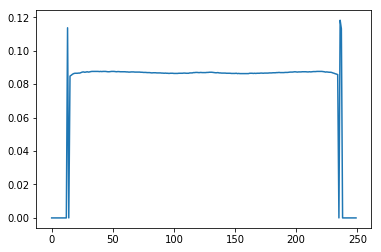

In [17]:
plt.plot(newThk.data.keys(),newThk.data.values())